## Introduction

The data set HMEQ reports characteristics and delinquency information for 5,960 home equity loans. A home equity loan is a loan where the obligor uses the equity of his or her home as the underlying collateral.

The data set has the following characteristics:

BAD: 1 = applicant defaulted on loan or seriously delinquent; 0 = applicant paid loan

LOAN: Amount of the loan request

MORTDUE: Amount due on existing mortgage

VALUE: Value of current property

REASON: DebtCon = debt consolidation; HomeImp = home improvement

JOB: Occupational categories

YOJ: Years at present job

DEROG: Number of major derogatory reports

DELINQ: Number of delinquent credit lines

CLAGE: Age of oldest credit line in months

NINQ: Number of recent credit inquiries

CLNO: Number of credit lines

DEBTINC: Debt-to-income ratio

## Import and load

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [73]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(colorscale='plotly', world_readable=True)

# Extra options
pd.options.display.max_rows = 30
pd.options.display.max_columns = 25

# Show all code cells outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import missingno

In [74]:
df = pd.read_csv("hmeq.csv")

In [75]:
df.head(15)

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
5,1,1700,30548.0,40320.0,HomeImp,Other,9.0,0.0,0.0,101.466002,1.0,8.0,37.113614
6,1,1800,48649.0,57037.0,HomeImp,Other,5.0,3.0,2.0,77.100000,1.0,17.0,NaN
7,1,1800,28502.0,43034.0,HomeImp,Other,11.0,0.0,0.0,88.766030,0.0,8.0,36.884894
8,1,2000,32700.0,46740.0,HomeImp,Other,3.0,0.0,2.0,216.933333,1.0,12.0,NaN
9,1,2000,NaN,62250.0,HomeImp,Sales,16.0,0.0,0.0,115.800000,0.0,13.0,NaN


In [76]:
df['JOB'].value_counts()

Other      2388
ProfExe    1276
Office      948
Mgr         767
Self        193
Sales       109
Name: JOB, dtype: int64

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
BAD        5960 non-null int64
LOAN       5960 non-null int64
MORTDUE    5442 non-null float64
VALUE      5848 non-null float64
REASON     5708 non-null object
JOB        5681 non-null object
YOJ        5445 non-null float64
DEROG      5252 non-null float64
DELINQ     5380 non-null float64
CLAGE      5652 non-null float64
NINQ       5450 non-null float64
CLNO       5738 non-null float64
DEBTINC    4693 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [78]:
# missing values
df.isna().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

# EDA

In [79]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

<Figure size 720x720 with 0 Axes>

Text(0.5,1,'Features Correlation')

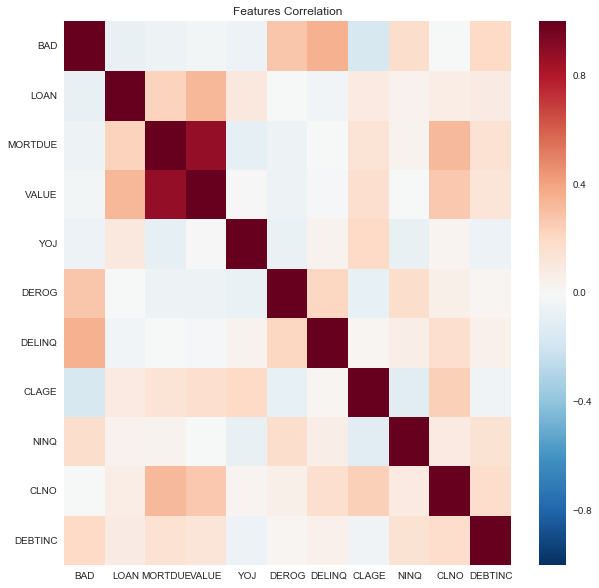

In [80]:
corr = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(data=corr)
plt.title("Features Correlation")

We can see, the mortgage value (MORTDUE) and value of the property (VALUE) are highly correlated. The CLAGE (Age of oldest credit line in months) is the second most related feature with the predicted variable(BAD).

In [81]:
df_copy = df.copy()
df.dropna(inplace=True)

In [82]:
df_for_fea_imp = df_copy.copy()

df_for_fea_imp.dropna(inplace=True)

In [83]:
reason_map = {'DebtCon':1,'HomeImp':2}
job_map = {'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}

df_for_fea_imp['REASON'] = df_for_fea_imp['REASON'].map(reason_map)
df_for_fea_imp['JOB'] = df_for_fea_imp['JOB'].map(job_map)

In [84]:
labels = df_for_fea_imp.iloc[:,0].values
data = df_for_fea_imp.iloc[:,1:].values

In [85]:
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(data,labels)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

LOAN = 0.08246402132096152
MORTDUE = 0.08427782008032972
VALUE = 0.09755557424485878
REASON = 0.012343733882544677
JOB = 0.0396745247500965
YOJ = 0.053742835098840445
DEROG = 0.043282385061218974
DELINQ = 0.08606557698554591
CLAGE = 0.10963716956473374
NINQ = 0.04551772713804537
CLNO = 0.08262449416385316
DEBTINC = 0.26281413770897105
Importance: 12
Columns: 12


<Figure size 720x720 with 0 Axes>

<BarContainer object of 12 artists>

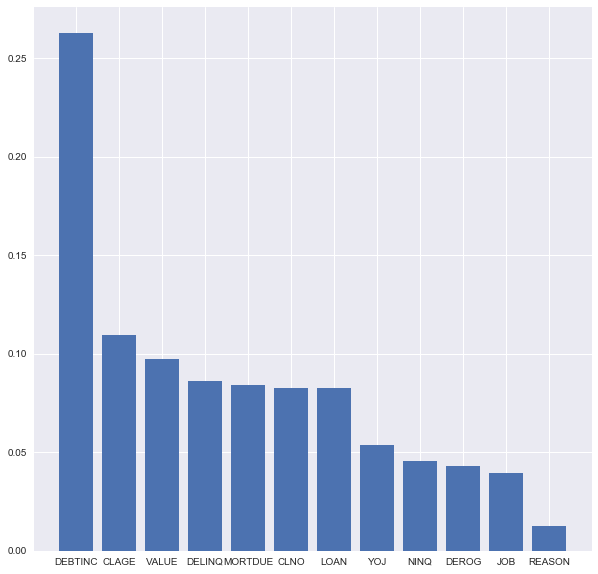

In [86]:
temp_df = pd.DataFrame(data=df_for_fea_imp.columns[1:],columns=['name'])
imps = []
for name, importance in zip(df_for_fea_imp.columns[1:], rnd_clf.feature_importances_):
    imps.append(importance)
    print(name, "=", importance)
print("Importance:",len(imps))
print("Columns:",len(df_for_fea_imp.columns[1:]))
temp_df['importances'] = imps

temp_df = temp_df.sort_values(by='importances',ascending=False)
plt.figure(figsize=(10,10))
plt.bar(x=temp_df['name'].tolist(),height=temp_df['importances'].tolist(),align='center')

Here we can see, DEBITINC has the highest importance followed by CLAGE and then VALUE. But the issue here is DEBITINC has the highest number of missing values.

--------------------------------------------------------------------------------------------------------------------------------

## Distribution of Loan Amount

(array([ 10.,  22.,  69., 105., 179., 218., 229., 288., 230., 237., 245.,
        217., 150., 162., 155., 128., 131., 138.,  78.,  53.,  47.,  47.,
         26.,  21.,  21.,  14.,  16.,  15.,  11.,   4.,   5.,   6.,   9.,
         12.,   9.,   9.,   0.,   0.,   3.,   6.,   1.,   3.,   2.,   8.,
          3.,   3.,   5.,   2.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   3.,   8.]),
 array([ 1700.,  3170.,  4640.,  6110.,  7580.,  9050., 10520., 11990.,
        13460., 14930., 16400., 17870., 19340., 20810., 22280., 23750.,
        25220., 26690., 28160., 29630., 31100., 32570., 34040., 35510.,
        36980., 38450., 39920., 41390., 42860., 44330., 45800., 47270.,
        48740., 50210., 51680., 53150., 54620., 56090., 57560., 59030.,
        60500., 61970., 63440., 64910., 66380., 67850., 69320., 70790.,
        72260., 73730., 75200., 76670., 78140., 79610., 81080., 82550.,
        84020., 85490., 86960., 88430., 89900.]),
 <a list of 60 Patch objects>)

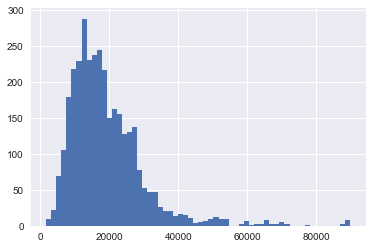

In [87]:
plt.hist(df['LOAN'],bins=60)

We can see the distribution is right skewed with most loans below 40000.

--------------------------------------------------------------------------------------------------------------------------------

(array([ 47.,  90., 108., 110., 119., 155., 299., 319., 314., 263., 269.,
        220., 160., 159., 116.,  98.,  53.,  50.,  54.,  60.,  66.,  53.,
         22.,   2.,   7.,   9.,  11.,  16.,  18.,  18.,  17.,   0.,   3.,
          7.,  16.,  24.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   4.,
          4.,   0.,   0.,   0.,   2.]),
 array([  5076.        ,  11648.26666667,  18220.53333333,  24792.8       ,
         31365.06666667,  37937.33333333,  44509.6       ,  51081.86666667,
         57654.13333333,  64226.4       ,  70798.66666667,  77370.93333333,
         83943.2       ,  90515.46666667,  97087.73333333, 103660.        ,
        110232.26666667, 116804.53333333, 123376.8       , 129949.06666667,
        136521.33333333, 143093.6       , 149665.86666667, 156238.13333333,
        162810.4       , 169382.66666667, 175954.93333333, 182527.2       ,
        189099.46666667, 195671.73333333, 202244.        ,

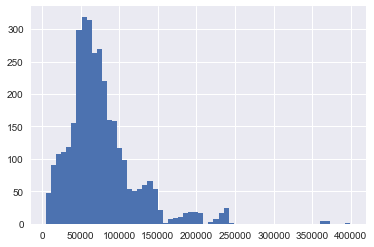

In [88]:
plt.hist(df['MORTDUE'].dropna(),bins=60)

Even for mortage amount, the distribution is right skewed.

--------------------------------------------------------------------------------------------------------------------------------

## Checking Statistics

In [89]:
#df = df_copy.copy()

In [90]:
df.mean()

BAD             0.089180
LOAN        19154.399524
MORTDUE     76249.621581
VALUE      107501.385850
YOJ             9.110285
DEROG           0.146849
DELINQ          0.278835
CLAGE         180.993684
NINQ            1.037455
CLNO           22.114150
DEBTINC        34.135451
dtype: float64

In [91]:
df.median()

BAD            0.000000
LOAN       17000.000000
MORTDUE    67278.500000
VALUE      94453.500000
YOJ            7.000000
DEROG          0.000000
DELINQ         0.000000
CLAGE        176.742048
NINQ           1.000000
CLNO          21.000000
DEBTINC       35.129484
dtype: float64

We can see that the mean is greater than the median for majority of the numeric rows. That means the data is right skewed.

--------------------------------------------------------------------------------------------------------------------------------

## Job Distribution

Text(0.5,0,'JOB')

Text(0.5,0,'JOB')

Text(0.5,0,'JOB')

Text(0.5,0,'JOB')

Text(0.5,0,'JOB')

Text(0.5,0,'JOB')

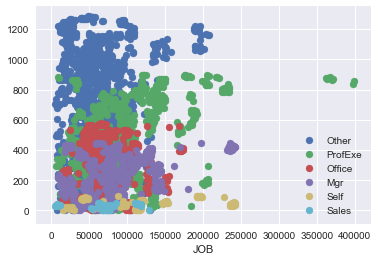

In [92]:
job_vals = df['JOB'].value_counts().index

for i in job_vals:
    x = df[df['JOB']==i].shape[0]
    plt.scatter(y=range(x),x=df.loc[df['JOB']==i]['MORTDUE'],alpha=1)
    plt.xlabel("JOB")
    plt.legend(df['JOB'].value_counts().index)

--------------------------------------------------------------------------------------------------------------------------------

## Reason for Bad Loan

Text(0.5,0,'REASON')

Text(0.5,0,'REASON')

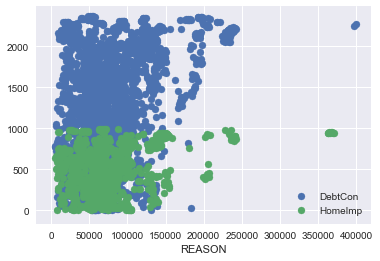

In [93]:
job_vals = df['REASON'].value_counts().index

for i in job_vals:
    x = df[df['REASON']==i].shape[0]
    plt.scatter(y=range(x),x=df.loc[df['REASON']==i]['MORTDUE'],alpha=1)
    plt.xlabel("REASON")
    plt.legend(df['REASON'].value_counts().index)

--------------------------------------------------------------------------------------------------------------------------------

## Derogatory reports

In [100]:
t = df.groupby('DEROG')['BAD'].value_counts(sort=False)

In [101]:
t

DEROG  BAD
0.0    0      2830
       1       222
1.0    0       168
       1        32
2.0    0        57
       1        22
3.0    0         9
       1        13
4.0    1         3
5.0    1         1
6.0    1         2
7.0    1         2
8.0    1         1
9.0    1         1
10.0   1         1
Name: BAD, dtype: int64

We would assume that having a higher number of derogatory reports for a certain individual would have a bad loan. But the data shows a different pattern.

In [102]:
ind = list(t.index.get_level_values(0).unique())

zeros = []
ones = []
for i in range(4):
    zeros.append(t[i][0])
    ones.append(t[i][1])

for i in range(4,11):
    ones.append(t[i][1])

for i in range(len(ones) - len(zeros)):
    zeros.append(0)

In [103]:
print("Zeros shape:",len(zeros))
print("Ones shape:",len(ones))
print("Index shape:",len(ind))

Zeros shape: 11
Ones shape: 11
Index shape: 11


Text(0.5,0,'No. of Derogatory Reports')

Text(0,0.5,'No of Bad Loans')

([<matplotlib.axis.XTick at 0x29351b97438>,
 <a list of 11 Text xticklabel objects>)

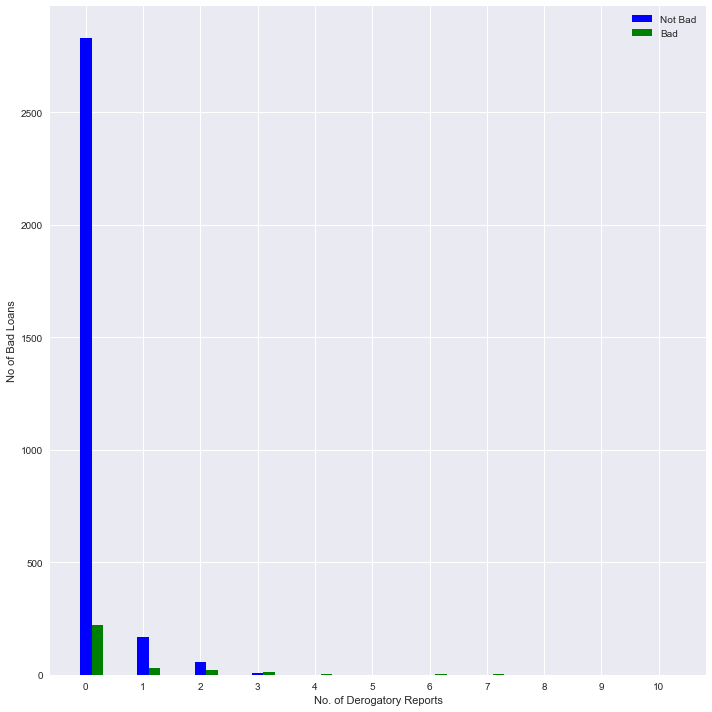

In [104]:
fig,ax = plt.subplots()
fig.set_size_inches(10,10)
a = plt.bar(x=np.arange(len(zeros)), height=zeros,width=0.2,color='b',align='center',label="Not Bad")
b = plt.bar(x=np.arange(len(ones))+0.2, height=ones,width=0.2,color='g',align='center',label="Bad")
plt.xlabel("No. of Derogatory Reports")
plt.ylabel("No of Bad Loans")
plt.xticks(ind)
plt.legend()
plt.tight_layout()

As we can see, even though people have no derogatory reports, they have the max number of bad loans. But, its counter intuitive, i.e. the bad loan count decreases as number of derogatory reports increase. But there is something amiss here!

In [105]:
# Ratio of deliquency 
ratios = []
for i in range(len(t)):
    try:
        s = t[i].sum()
        ratio = t[i][1]/s
        ratios.append(ratio)
        print("The ratio of Defaulters for %d derogatory reports are: %d",i,ratio)
    except:
        print("No %d derogatory reports data available.",i)

The ratio of Defaulters for %d derogatory reports are: %d 0 0.0727391874180865
The ratio of Defaulters for %d derogatory reports are: %d 1 0.16
The ratio of Defaulters for %d derogatory reports are: %d 2 0.27848101265822783
The ratio of Defaulters for %d derogatory reports are: %d 3 0.5909090909090909
The ratio of Defaulters for %d derogatory reports are: %d 4 1.0
The ratio of Defaulters for %d derogatory reports are: %d 5 1.0
The ratio of Defaulters for %d derogatory reports are: %d 6 1.0
The ratio of Defaulters for %d derogatory reports are: %d 7 1.0
The ratio of Defaulters for %d derogatory reports are: %d 8 1.0
The ratio of Defaulters for %d derogatory reports are: %d 9 1.0
The ratio of Defaulters for %d derogatory reports are: %d 10 1.0
No %d derogatory reports data available. 11
No %d derogatory reports data available. 12
No %d derogatory reports data available. 13
No %d derogatory reports data available. 14


We can see that the ratio is increasing, as the number of derogatory reports increase. Looking at the absolute number of bad loans, gives us a wrong estimate.

<BarContainer object of 11 artists>

([<matplotlib.axis.XTick at 0x29351b9b940>,
 <a list of 11 Text xticklabel objects>)

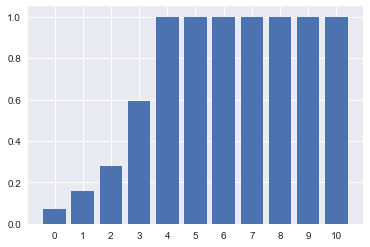

In [106]:
ind = t.index.get_level_values(0).unique()

plt.bar(x=ind,height=ratios)
plt.xticks(ind)

As we see, the increase in number of derogatory reports results in the increase in the ratio of bad loans among customers

--------------------------------------------------------------------------------------------------------------------------------

## Delinquent Credit Lines

In [107]:
df['DELINQ'].value_counts()

0.0     2824
1.0      324
2.0      124
3.0       50
4.0       21
6.0        7
5.0        6
7.0        6
10.0       1
8.0        1
Name: DELINQ, dtype: int64

In [108]:
delinq_groups = df.groupby('DELINQ')['BAD'].value_counts(sort=False)

In [109]:
delinq_groups

DELINQ  BAD
0.0     0      2635
        1       189
1.0     0       282
        1        42
2.0     0        95
        1        29
3.0     0        39
        1        11
4.0     0        13
        1         8
5.0     1         6
6.0     1         7
7.0     1         6
8.0     1         1
10.0    1         1
Name: BAD, dtype: int64

Same as number of derogatory reports, it seems delinquent credit lines also doesnt provide much of a relationship with defaulting a loan. But think again!!!

In [110]:
# Ratio of deliquency 
ratios = []
for i in range(len(delinq_groups)):
    try:
        s = delinq_groups[i].sum()
        ratio = delinq_groups[i][1]/s
        ratios.append(ratio)
        print("The ratio of Defaulters for %d delinquent credit lines are: %d",i,ratio)
    except:
        print("No %d delinquent credit lines data available.",i)

The ratio of Defaulters for %d delinquent credit lines are: %d 0 0.06692634560906516
The ratio of Defaulters for %d delinquent credit lines are: %d 1 0.12962962962962962
The ratio of Defaulters for %d delinquent credit lines are: %d 2 0.23387096774193547
The ratio of Defaulters for %d delinquent credit lines are: %d 3 0.22
The ratio of Defaulters for %d delinquent credit lines are: %d 4 0.38095238095238093
The ratio of Defaulters for %d delinquent credit lines are: %d 5 1.0
The ratio of Defaulters for %d delinquent credit lines are: %d 6 1.0
The ratio of Defaulters for %d delinquent credit lines are: %d 7 1.0
The ratio of Defaulters for %d delinquent credit lines are: %d 8 1.0
No %d delinquent credit lines data available. 9
The ratio of Defaulters for %d delinquent credit lines are: %d 10 1.0
No %d delinquent credit lines data available. 11
No %d delinquent credit lines data available. 12
No %d delinquent credit lines data available. 13
No %d delinquent credit lines data available. 14


<BarContainer object of 10 artists>

([<matplotlib.axis.XTick at 0x29351b90d30>,
 <a list of 10 Text xticklabel objects>)

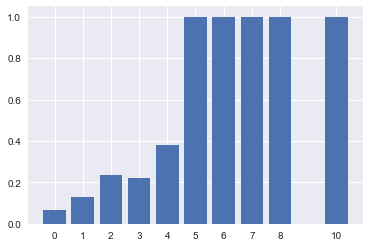

In [111]:
ind = delinq_groups.index.get_level_values(0).unique()

plt.bar(x=ind,height=ratios)
plt.xticks(ind)

As we see, as the number of deliquent reports increase, the ratio of customers defaulting on a loan increases to the toal number of customer.

--------------------------------------------------------------------------------------------------------------------------------

## CLAGE 

(array([  5.,   6.,  12.,  20.,  37.,  76., 122., 174., 164., 195., 225.,
        183., 132., 134., 183., 208., 207., 194., 148., 140., 158.,  99.,
         93.,  84.,  79.,  68.,  65.,  41.,  24.,  27.,  18.,   7.,   3.,
          1.,  10.,   0.,   2.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   9.,   4.,
          2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([4.86711451e-01, 1.21641799e+01, 2.38416484e+01, 3.55191169e+01,
        4.71965854e+01, 5.88740539e+01, 7.05515224e+01, 8.22289909e+01,
        9.39064594e+01, 1.05583928e+02, 1.17261396e+02, 1.28938865e+02,
        1.40616333e+02, 1.52293802e+02, 1.63971270e+02, 1.75648739e+02,
        1.87326207e+02, 1.9900

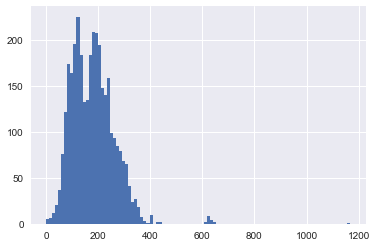

In [112]:
plt.hist(df['CLAGE'],bins=100)

This slightly resembles a normal distribution of data, right skewed. 

CLAGE doesnt seem to have any apparent relationship with any of the other features as well as the predicting variable.

## DEBTINC

In [113]:
df['DEBTINC']

5       37.113614
7       36.884894
19      31.588503
25      38.263601
26      29.681827
34      30.051136
35      29.915859
36      36.211348
37      49.206396
38      32.059783
56      42.909997
59      35.730559
67      29.393543
69      20.470916
70      26.634348
          ...    
5927    29.582301
5928    30.378548
5929    29.220351
5934    40.929793
5949    36.088037
5950    36.753653
5951    36.262691
5952    34.751158
5953    34.242465
5954    34.818262
5955    36.112347
5956    35.859971
5957    35.556590
5958    34.340882
5959    34.571519
Name: DEBTINC, Length: 3364, dtype: float64

(array([  2.,   2.,   4.,   2.,   5.,   0.,   0.,   0.,   6.,   5.,  13.,
         22.,  34.,  51.,  65.,  82., 112., 130., 155., 172., 169., 169.,
        213., 284., 313., 302., 303., 325., 216., 118.,  25.,  11.,  14.,
          6.,   3.,   1.,   3.,   1.,   1.,   3.,   1.,   2.,   2.,   1.,
          3.,   1.,   1.,   1.,   1.,   2.,   1.,   0.,   1.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.]), array([  0.83811753,   2.27162636,   3.7051352 ,   5.13864404,
          6.57215288,   8.00566171,   9.43917055,  10.87267939,
         12.30618823,  13.73969706,  15.1732059 ,  16.60671474,
         18.04022358,  19.47373241,  20.90724125,  22.34075009,
         23.77425893,  25.20776777,  26.6412766 ,  28.07478544,

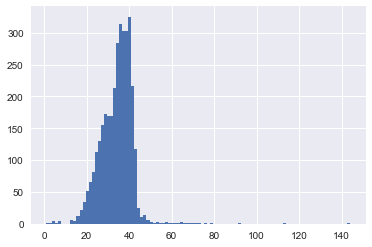

In [114]:
plt.hist(df['DEBTINC'],bins=100)

The only column in the feature space to be left skewed as mean is lesser than the median.

In [115]:
df.groupby('BAD')['DEBTINC'].mean()

BAD
0    33.595725
1    39.647852
Name: DEBTINC, dtype: float64

In [116]:
df.groupby('REASON')['DEBTINC'].mean()

REASON
DebtCon    34.233592
HomeImp    33.901788
Name: DEBTINC, dtype: float64

# Features Correlations

# Classifiers

In [117]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import lightgbm as lgb
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, matthews_corrcoef, roc_auc_score, recall_score, precision_score

In [118]:
df['BAD'].value_counts()

0    3064
1     300
Name: BAD, dtype: int64

In [119]:
#unimportant columns as seen from the importance of features table above
df.drop(columns=['JOB','REASON','DEROG','NINQ'],inplace=True)

In [120]:
'''
reason_map = {'DebtCon':1,'HomeImp':2}
job_map = {'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}

df['REASON'] = df['REASON'].map(reason_map)
df['JOB'] = df['JOB'].map(job_map)
'''

"\nreason_map = {'DebtCon':1,'HomeImp':2}\njob_map = {'Other':1,'ProfExe':2,'Office':3,'Mgr':4,'Self':5,'Sales':6}\n\ndf['REASON'] = df['REASON'].map(reason_map)\ndf['JOB'] = df['JOB'].map(job_map)\n"

In [121]:
df_good = df[df['BAD']==0]
df_bad = df[df['BAD']==1].sample(n=len(df_good),replace=True) #upsampling the lesser class, to equalize the number of samples

df_good = df_good.sample(frac=1)
df_bad = df_bad.sample(frac=1)

df_train_good = df_good.iloc[200:]
df_train_bad = df_bad.iloc[200:]

df_train = df_train_good.append(df_train_bad)

In [122]:
df_test_good = df_good.iloc[:200]
df_test_bad = df_bad.iloc[:200]

df_test = df_test_good.append(df_test_bad)

In [123]:
y_train = df_train['BAD'].tolist()
y_test = df_test['BAD'].tolist()

df_train.drop(columns=['BAD'],inplace=True)
df_test.drop(columns=['BAD'],inplace=True)

In [124]:
x_train = df_train.values
x_test = df_test.values

In [125]:
x_train.shape

(5728, 8)

In [126]:
pd.Series(y_train).value_counts()

1    2864
0    2864
dtype: int64

In [127]:
x_test.shape

(400, 8)

## XGBoost

In [128]:
grid_params = {
    'n_estimator' : [100,500,1000],
    'min_child_weight' : [1,3,5,7],
    'max_depth' : [5,7,10],
    'learning_rate' : [0.01,0.001,0.0001],
    'gamma' : [0,1,2,3,4,5,6,7],
    'subsample' : [0.8,0.9,1.0],
    'colsample_bytree' : [0.8,0.9,1],
    #'eval_metric' : ['auc','error','logloss']
}

In [129]:
'''
gd_sr = GridSearchCV(estimator=xgb_model,
                    param_grid = grid_params,
                    n_jobs = -1,
                    cv = 5)
'''

'\ngd_sr = GridSearchCV(estimator=xgb_model,\n                    param_grid = grid_params,\n                    n_jobs = -1,\n                    cv = 5)\n'

In [130]:
#parameters tuned with GridSearchCV

xgb_model = XGBClassifier.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimator=100,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', predictor='gpu_predictor',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

In [131]:
xgb_model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimator=100,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', predictor='gpu_predictor',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1.0)

In [132]:
preds = xgb_model.predict(x_test)

E:\Users\Nate\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



In [133]:
conf = confusion_matrix(y_test,preds)
TN, FP, FN, TP = confusion_matrix(y_test,preds).ravel()
print("Confusion Matrix:")
print(conf)
print(TN,FP,FN,TP)
print("Accuracy Score:",accuracy_score(y_test,preds))
print("Recall Score:",recall_score(y_test,preds))
print("Precision Score:",precision_score(y_test,preds))
print("f1 score:",f1_score(y_test,preds))
print("Matthew Correlation Coefficient:",matthews_corrcoef(y_test,preds))
print("ROC AUC score:", roc_auc_score(y_test,preds))

Confusion Matrix:
[[180  20]
 [ 54 146]]
180 20 54 146
Accuracy Score: 0.815
Recall Score: 0.73
Precision Score: 0.8795180722891566
f1 score: 0.7978142076502732
Matthew Correlation Coefficient: 0.6393056938253822
ROC AUC score: 0.815


## Logistic Regression

In [134]:
log_grid_params = {
    'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty' : ['l1'],
    #'solver' : ['liblinear','sag','saga']
}

In [135]:
# Hyperparameters tuned with GridSearchCV
lr = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [136]:

'''
log_reg_grid = GridSearchCV(estimator=lr,
                           param_grid = log_grid_params,
                           scoring = 'accuracy', 
                           cv = 5,
                           n_jobs = -1)
'''

"\nlog_reg_grid = GridSearchCV(estimator=lr,\n                           param_grid = log_grid_params,\n                           scoring = 'accuracy', \n                           cv = 5,\n                           n_jobs = -1)\n"

In [137]:
lr.fit(x_train,y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [138]:
log_preds = lr.predict(x_test)

In [139]:
conf = confusion_matrix(y_test,log_preds)
TN, FP, FN, TP = confusion_matrix(y_test,preds).ravel()
print("Confusion Matrix:")
print(conf)
print(TN,FP,FN,TP)
print("Accuracy Score:",accuracy_score(y_test,log_preds))
print("Recall Score:",recall_score(y_test,log_preds))
print("Precision Score:",precision_score(y_test,log_preds))
print("f1 score:",f1_score(y_test,log_preds))
print("Matthew Correlation Coefficient:",matthews_corrcoef(y_test,log_preds))
print("ROC AUC score:", roc_auc_score(y_test,log_preds))

Confusion Matrix:
[[158  42]
 [ 81 119]]
180 20 54 146
Accuracy Score: 0.6925
Recall Score: 0.595
Precision Score: 0.7391304347826086
f1 score: 0.6592797783933517
Matthew Correlation Coefficient: 0.39253540712041146
ROC AUC score: 0.6925


# Future Scope

I am planning to implement the following things:

1) Improving the quality of EDA


2) Trying out more ML classification Algorithms

3) Trying out some sort of Feature Engineering

4) Ensembling the models

5) Filling missing data instead of removing it